# Beyond Hello World, A Computer Vision Example

In [10]:
from __future__ import division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__, keras.__version__)

2.0.0 2.2.4-tf


## Loading MNIST Fashion dataset

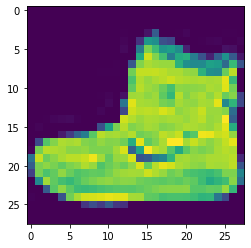

In [34]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = \
    mnist.load_data()
training_images, test_images = training_images/255.0, test_images/255.0
plt.imshow(training_images[0])

## Define model
**Sequential** defines a sequence of layers in the NN

**Flatten** convert 2 dimensional set to 1 dimensional

**Dense** Adds a layer of neurons

**Activation functions** Relu: passes values 0  or greater to the next layer, Softmax: pick the biggest one in a set of values

In [35]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
print(model.evaluate(test_images, test_labels, verbose=0))

classifications = model.predict(test_images)
print(classifications[0], test_labels[0])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4714 - accuracy: 0.8303 - loss: 0.4741 - ac
Epoch 2/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3565 - accuracy: 0.8690
Epoch 3/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3215 - accuracy: 0.8811
Epoch 4/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2970 - accuracy: 0.8896
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2796 - accuracy: 0.8967
[0.3424292964696884, 0.8819]
[6.7345741e-07 6.5835382e-09 2.0648210e-09 1.1012987e-09 2.5582935e-08
 3.9033624e-04 5.9741083e-09 3.4409638e-03 1.4643876e-08 9.9616796e-01] 9


## Callback for early stop

In [39]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

print(model.evaluate(test_images, test_labels, verbose=0))

classifications = model.predict(test_images)
print(classifications[0], test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4766
Epoch 2/15
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3600
Epoch 3/15
60000/60000 [==============================] - 7s 112us/sample - loss: 0.3211
Epoch 4/15
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2978
Epoch 5/15
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2810
Epoch 6/15
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2653
Epoch 7/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2536
Epoch 8/15
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2416
Epoch 9/15
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2323
Epoch 10/15
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2231
Epoch 11/15
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])

print(model.evaluate(test_images, test_labels, verbose=0))

classifications = model.predict(test_images)
print(classifications[0], test_labels[0])

2.0.0
Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4763 - accuracy: 0.8290
Epoch 2/15
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3601 - accuracy: 0.8680
Epoch 3/15
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3220 - accuracy: 0.8807
Epoch 4/15
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2981 - accuracy: 0.8892
Epoch 5/15
 4416/60000 [=>............................] - ETA: 4s - loss: 0.2769 - accuracy: 0.8904